# Car (Re-)Selling Price Prediction

## Setting up the environments

In [1632]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

Source : https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

In [1571]:
df = pd.read_csv("car details.csv")
df.head(3)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0


## Exploratory Data Analysis (EDA)

In [1572]:
#shape of the data
df.shape

(2059, 20)

There are 20 variables and 2059 instances of car.

In [1573]:
#explore the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

**Check for Missing values**

In [1574]:
#Observing frequency of missing values across rows
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

Total 9 variables have missing values.

In [1575]:
#Observing frequency of missing values across columns
df_miss = df.isnull().sum(axis=1).sort_values(ascending=False)
df_miss

296     9
1438    9
1334    9
2025    9
138     9
       ..
713     0
712     0
711     0
710     0
1029    0
Length: 2059, dtype: int64

In [1576]:
#missing count of variables for each rows
df_miss.value_counts()

0    1874
1     105
9      64
4      16
dtype: int64

- There are 16 rows with 4 missing variables.
- There are 64 rows with 9 missing variables.
- There are 105 row with 1 missing variable.

Let's analyze each of the values to check how to handle the missing values.

In [1577]:
#Analysing instances with missing variables == 9 
df_miss9 = df[df.isnull().sum(axis=1) == 9]
df_miss9.shape

(64, 20)

In [1578]:
#Replacing missing values with corresponding values with same model name
count = 0
for idx, d in df_miss9.iterrows() :
    res = df[(df["Model"] == d["Model"]) &  ( df["Length"].notnull()) &  ( df["Width"].notnull()) &  ( df["Height"].notnull())
            &  ( df["Engine"].notnull()) &  ( df["Drivetrain"].notnull()) &  ( df["Max Power"].notnull()) &  ( df["Max Torque"].notnull())
            ]
    if res.shape[0] > 0 :
        res = res.iloc[[0]]
        df.at[idx, "Length"] = res.Length.iloc[0]
        df.at[idx, "Width"] = res.Width.iloc[0]
        df.at[idx, "Height"] = res.Height.iloc[0]
        df.at[idx, "Engine"] = res.Engine.iloc[0]
        df.at[idx, "Max Power"] = res["Max Power"].iloc[0]
        df.at[idx, "Max Torque"] = res["Max Torque"].iloc[0] 
        df.at[idx, "Drivetrain"] = res["Drivetrain"].iloc[0]
        df.at[idx, "Seating Capacity"] = res["Seating Capacity"].iloc[0]
        df.at[idx, "Fuel Tank Capacity"] =res["Fuel Tank Capacity"].iloc[0]
    else :
        count = count +1
    
print(f"There are {count} instances of missing car data that do not have matching models.")

There are 53 instances of missing car data that do not have matching models.


In [1579]:
df_miss9 = df[df.isnull().sum(axis=1) == 9]
df_miss9.shape

(53, 20)

Estimating car attributes would not be correct as it might introduce incorrect values, thus we will drop these instances from our dataset.

In [1580]:
#removing instances with 9 missing variables
df = df[df.isnull().sum(axis=1) < 9]
df.shape

(2006, 20)

In [1581]:
#Analysing instances with missing variables = 4  
df_miss4 = df[df.isnull().sum(axis=1)== 4]
df_miss4.shape

(16, 20)

In [1582]:
df_miss4.isna().sum()

Make                   0
Model                  0
Price                  0
Year                   0
Kilometer              0
Fuel Type              0
Transmission           0
Location               0
Color                  0
Owner                  0
Seller Type            0
Engine                16
Max Power             16
Max Torque            16
Drivetrain             9
Length                 0
Width                  0
Height                 0
Seating Capacity       0
Fuel Tank Capacity     7
dtype: int64

On exploring instances with 4 missing values we can see that "Engine", "Max Torque" and "Max Power" are missing in all of the instances. Some of them have "Drivetrain" or "Fuel Tank Capacity".

4 Missing values where one of this variable is Fuel Tank Capacity :  7<br>
4 Missing values where one of this variable is Drivetrain :  9

In [1583]:
#Replacing missing values with corresponding values with same model name
count = 0
for idx, d in df_fuel.iterrows() :
    res = df[(df["Model"] == d["Model"]) &  ( df["Engine"].notnull())&  ( df["Max Torque"].notnull()) &  ( df["Max Power"].notnull()) &  ( df['Fuel Tank Capacity'].notnull())]
    if res.shape[0] > 0 :
        res = res.iloc[[0]]
        df.at[idx, "Engine"] = res.Engine.iloc[0]
        df.at[idx, "Max Power"] = res["Max Power"]
        df.at[idx, "Max Torque"] = res["Max Torque"] 
        df.at[idx, "Fuel Tank Capacity"] =res["Fuel Tank Capacity"]
    else :
        count = count +1
print(f"There are {count} instances of missing car data that do not have matching models.")

There are 7 instances of missing car data that do not have matching models.


In [1584]:
#Replacing missing values with corresponding values with same model name
count = 0
for idx, d in df_dt.iterrows() :
    res = df[(df["Model"] == d["Model"]) &  ( df["Engine"].notnull())&  ( df["Max Torque"].notnull()) &  ( df["Max Power"].notnull()) &  ( df['Drivetrain'].notnull())]
    if res.shape[0] > 0 :
        res = res.iloc[[0]]
        df.at[idx, "Engine"] = res.Engine
        df.at[idx, "Max Power"] = res["Max Power"]
        df.at[idx, "Max Torque"] = res["Max Torque"] 
        df.at[idx, "Fuel Tank Capacity"] =res["Fuel Tank Capacity"]
    else :
        count = count +1
print(f"There are {count} instances of missing car data that do not have matching models.")

There are 9 instances of missing car data that do not have matching models.


Since we couldn't find matching instances of car details to replace the missing values, we delete the rows. 

In [1585]:
#removing instances with 4 missing value
df = df[df.isnull().sum(axis=1) < 4]
df.shape

(1990, 20)

In [1586]:
#Analysing instances with missing values = 1 
df_miss1 = df[df.isnull().sum(axis=1)== 1]
df_miss1_fuel = df_miss1[df_miss1["Fuel Tank Capacity"].isnull()]
df_miss1_dt = df_miss1[df_miss1["Drivetrain"].isnull()]
df_miss1.isnull().sum()

Make                   0
Model                  0
Price                  0
Year                   0
Kilometer              0
Fuel Type              0
Transmission           0
Location               0
Color                  0
Owner                  0
Seller Type            0
Engine                 0
Max Power              0
Max Torque             0
Drivetrain            63
Length                 0
Width                  0
Height                 0
Seating Capacity       0
Fuel Tank Capacity    42
dtype: int64

We can see that for remaining missing values we have 63 instances of Drivetrain and 42 instances of Fuel Tank Capacity.

In [1587]:
#Replacing missing values with corresponding values with same model name
count = 0
for idx, d in df_miss1_fuel.iterrows() :
    res = df[(df["Model"] == d["Model"]) & (df["Fuel Tank Capacity"].notnull()) ]
    if res.shape[0] > 0 :
        res = res.iloc[[0]]
        df.at[idx, "Fuel Tank Capacity"] =res["Fuel Tank Capacity"]
    else :
        count = count +1
print(f"There are {count} instances of missing car data that do not have matching models.")

There are 36 instances of missing car data that do not have matching models.


In [1588]:
#Replacing missing values with corresponding values with same model name
count = 0
for idx, d in df_miss1_dt.iterrows() :
    res = df[(df["Model"] == d["Model"]) & (df["Drivetrain"].notnull()) ]
    if res.shape[0] > 0 :
        res = res.iloc[[0]]
        df.at[idx, "Drivetrain"] =res["Drivetrain"].iloc[0]
    else :
        count = count +1
print(f"There are {count} instances of missing car data that do not have matching models.")

There are 56 instances of missing car data that do not have matching models.


In [1589]:
#finding frequency of Drivetrain for each Make to determine ideal replacements values, if any. 
makes = df_miss1_dt['Make'].unique()
df_filtered = df[df['Make'].isin(makes)]
df_pivot = pd.pivot_table(df_filtered, values='Length', index='Make', columns='Drivetrain', aggfunc='count')
df_pivot

Drivetrain,AWD,FWD,RWD
Make,,,
Audi,54.0,64.0,NaN
BMW,36.0,7.0,76.0
Chevrolet,NaN,4.0,NaN
Fiat,NaN,1.0,NaN
Ford,9.0,33.0,5.0
Honda,3.0,152.0,NaN
Hyundai,4.0,334.0,NaN
MG,2.0,11.0,NaN
MINI,NaN,9.0,NaN


We can see that all the Make of "Chevrolet", "Fiat", "MINI" have only "FWD" as drivetrain. So we can replace missing drivetrain in these Make as "FWD".

In [1590]:
#replacing missing values of drivetrain with FWD
idx = df_miss1_dt[df_miss1_dt['Make'].isin(["Chevrolet", "Fiat", "MINI"])].index
df.loc[idx] = df.loc[idx].fillna('FWD')
df.loc[idx]

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
360,Fiat,Linea Emotion 1.4,235000,2011,54000,Petrol,Manual,Nashik,Black,First,Individual,1368 cc,90@6000,115@4500,FWD,4560.0,1730.0,1487.0,5.0,45.0
740,Chevrolet,Cruze LTZ,320000,2011,75000,Diesel,Manual,Kanpur,Purple,Second,Individual,1991 cc,150@4000,327@2600,FWD,4597.0,1788.0,1477.0,5.0,60.0
747,MINI,Cooper S,3200000,2017,10500,Petrol,Automatic,Mumbai,Black,First,Individual,1998 cc,189 bhp @,280 Nm @ 1250 rpm,FWD,3850.0,1727.0,1414.0,4.0,44.0
835,MINI,Cooper S,3900000,2020,13000,Petrol,Automatic,Delhi,Black,First,Individual,1998 cc,189 bhp @,280 Nm @ 1250 rpm,FWD,3850.0,1727.0,1414.0,4.0,44.0
1356,Chevrolet,Captiva LTZ AWD AT,475000,2012,74000,Diesel,Automatic,Mohali,White,First,Individual,1991 cc,150@4000,320@2000,FWD,4660.0,1870.0,1755.0,7.0,65.0
1518,Chevrolet,Cruze LTZ,400000,2011,80000,Diesel,Manual,Mumbai,Silver,Third,Individual,1991 cc,150@4000,327@2600,FWD,4597.0,1788.0,1477.0,5.0,60.0


Further, research suggests following about Drivetrain for respective Make of the cars. 
- Model = {"Q5 3.0 TDI quattro"} has AWD as drivetrain.
- Model = {"5-Series 525d Sedan", "Xylo D2 BS-IV", "Xylo D4", "Ritz Vdi BS-IV", "Safari 4x2 EX TCIC", "Grande GX" } has RWD.
- Model = {"Ikon DuraTorq 1.4 TDCi", "City CVT", "Hector Sharp 1.5 DCT Petrol [2019-2020]", "Wagon R VXi", "Alto LXi BS-III", "Wagon R LXi CNG", "Estilo VXi", "SX4 VXi", "Wagon R LXi", "Ritz Ldi BS-IV", "Manza Aqua Safire BS-IV"} has FWD.
- Model for Hyundai Make that have missing drivetrain is FWD while those of Totyota is RWD.

In [1591]:
#replacing missing values of Hyundai's drivetrain with FWD
idx = df_miss1_dt[df_miss1_dt['Make'].isin(["Hyundai"])].index
df.loc[idx] = df.loc[idx].fillna('FWD')

#replacing missing values of Totyota's drivetrain with RWD
idx = df_miss1_dt[df_miss1_dt['Make'].isin(["Toyota"])].index
df.loc[idx] = df.loc[idx].fillna('RWD')

#replacing missing values of drivetrain with AWD
idx = df_miss1_dt[df_miss1_dt['Model'].isin(["Q5 3.0 TDI quattro"])].index
df.loc[idx] = df.loc[idx].fillna('AWD')

#replacing missing values of drivetrain with RWD
idx = df_miss1_dt[df_miss1_dt['Model'].isin(["5-Series 525d Sedan", "Xylo D2 BS-IV", "Xylo D4", "Ritz Vdi BS-IV", "Safari 4x2 EX TCIC", "Grande GX"])].index
df.loc[idx] = df.loc[idx].fillna('RWD')

#replacing missing values of drivetrain with FWD
idx = df_miss1_dt[df_miss1_dt['Model'].isin(["Ikon DuraTorq 1.4 TDCi", "City CVT", "Hector Sharp 1.5 DCT Petrol [2019-2020]", "Wagon R VXi", "Alto LXi BS-III", "Wagon R LXi CNG", "Estilo VXi", "SX4 VXi", "Wagon R LXi", "Ritz Ldi BS-IV", "Manza Aqua Safire BS-IV"])].index
df.loc[idx] = df.loc[idx].fillna('FWD')


In [1592]:
df.isna().sum()

Make                   0
Model                  0
Price                  0
Year                   0
Kilometer              0
Fuel Type              0
Transmission           0
Location               0
Color                  0
Owner                  0
Seller Type            0
Engine                 0
Max Power              0
Max Torque             0
Drivetrain             0
Length                 0
Width                  0
Height                 0
Seating Capacity       0
Fuel Tank Capacity    36
dtype: int64

Now we just have 36 missing instances of Fuel Tank Capacity with no matches, so we can drop them rather than estimating it with incorrect values.

In [1593]:
#removing instances with missing values
df = df.dropna()
df.shape

(1954, 20)

**Cleaning invalid values** <br>
1. Engine has int value followed by units "cc", since we only need integer value we will process the variable.

In [1594]:
df.Engine.head(3)

0    1198 cc
1    1248 cc
2    1197 cc
Name: Engine, dtype: object

In [1595]:
df['Engine'] = df['Engine'].str.replace('cc', '').str.strip()
df['Engine'].head(3)

0    1198
1    1248
2    1197
Name: Engine, dtype: object

2. Max Torque

In [1598]:
df['Torque-Nm'] = df['Max Torque'].str.extract(r'(\d+\.?\d*)\s*(?:@|\bNm\b)')
df['Torque-rpm'] = df['Max Torque'].str.extract(r'^(?:\d+\.?\d*)\s*(?:@|\bNm\b\s*@)\s*(\d+)')
df[['Max Torque','Torque-Nm','Torque-rpm']].head(3)

,Max Torque,Torque-Nm,Torque-rpm
0,109 Nm @ 4500 rpm,109,4500
1,190 Nm @ 2000 rpm,190,2000
2,112.7619 Nm @ 4000 rpm,112.7619,4000


3. Max Power

In [1599]:
df['Power-bhp'] = df['Max Power'].str.extract(r'(\d+\.?\d*)\s*(?:@|\bbhp\b)')
df['Power-rpm'] = df['Max Power'].str.extract(r'^(?:\d+\.?\d*)\s*(?:@|\bbhp\b\s*@)\s*(\d+)')
df[['Max Power','Power-bhp','Power-rpm']].head(3)

,Max Power,Power-bhp,Power-rpm
0,87 bhp @ 6000 rpm,87,6000
1,74 bhp @ 4000 rpm,74,4000
2,79 bhp @ 6000 rpm,79,6000


In [1600]:
df.isna().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
Torque-Nm             0
Torque-rpm            0
Power-bhp             0
Power-rpm             4
dtype: int64

There are 4 values that are not correctly extracted. Let's dive in deeper.

In [1601]:
df[df['Power-rpm'].isna()][['Max Power','Power-bhp','Power-rpm']]

,Max Power,Power-bhp,Power-rpm
456,112 bhp @,112,NaN
747,189 bhp @,189,NaN
835,189 bhp @,189,NaN
2014,112 bhp @,112,NaN


These 4 values do not have rpm instances for 2 models of Make MINI.

In [1602]:
#Analysing Cooper S model of MINI
df[df['Power-bhp'].isin(['189'])][['Make','Model','Engine','Max Power','Power-bhp','Power-rpm', 'Max Torque', 'Torque-Nm','Torque-rpm']]

,Make,Model,Engine,Max Power,Power-bhp,Power-rpm,Max Torque,Torque-Nm,Torque-rpm
650,BMW,X1 sDrive20i xLine,1998,189 bhp @ 5000 rpm,189,5000,280 Nm @ 1350 rpm,280,1350
747,MINI,Cooper S,1998,189 bhp @,189,NaN,280 Nm @ 1250 rpm,280,1250
835,MINI,Cooper S,1998,189 bhp @,189,NaN,280 Nm @ 1250 rpm,280,1250
1101,MINI,Countryman Cooper S JCW Inspired,1998,189 bhp @ 4400 rpm,189,4400,280 Nm @ 1350 rpm,280,1350
1274,BMW,X1 sDrive20i xLine,1998,189 bhp @ 5000 rpm,189,5000,280 Nm @ 1350 rpm,280,1350


Let's estimate the missing value to 4400 based on the above data.

In [1603]:
#imputing the missing value with estimate
df.loc[df['Power-rpm'].isna() & (df['Power-bhp'].eq('189')), 'Power-rpm'] = '4400'
df[(df['Power-bhp'].isin(['189']))][['Max Power','Power-bhp','Power-rpm']]

,Max Power,Power-bhp,Power-rpm
650,189 bhp @ 5000 rpm,189,5000
747,189 bhp @,189,4400
835,189 bhp @,189,4400
1101,189 bhp @ 4400 rpm,189,4400
1274,189 bhp @ 5000 rpm,189,5000


In [1604]:
#Analysing Countryman Cooper D model of MINI
df[df['Power-bhp'].isin(['112'])][['Make','Model','Engine','Max Power','Power-bhp','Power-rpm', 'Max Torque', 'Torque-Nm','Torque-rpm']]
df[df['Engine'].isin(['1995']) ][['Make','Model','Engine','Max Power','Power-bhp','Power-rpm', 'Max Torque', 'Torque-Nm','Torque-rpm']].sort_values(by='Power-bhp')

,Make,Model,Engine,Max Power,Power-bhp,Power-rpm,Max Torque,Torque-Nm,Torque-rpm
456,MINI,Countryman Cooper D,1995,112 bhp @,112,NaN,270 Nm @ 1750 rpm,270,1750
2014,MINI,Countryman Cooper D,1995,112 bhp @,112,NaN,270 Nm @ 1750 rpm,270,1750
470,Maruti Suzuki,Grand Vitara 2015 2.0 AT,1995,120@5500,120,5500,170@3500,170,3500
900,BMW,5-Series 520d Sedan,1995,177@4000,177,4000,350@1750,350,1750
816,Hyundai,Tucson GL 2WD AT Diesel,1995,182 bhp @ 4000 rpm,182,4000,400 Nm @ 1750 rpm,400,1750
...,...,...,...,...,...,...,...,...,...
630,BMW,5-Series 520d Luxury Line,1995,190 bhp @ 4000 rpm,190,4000,400 Nm @ 1750 rpm,400,1750
1114,BMW,5-Series 520d M Sport,1995,190 bhp @ 4000 rpm,190,4000,400 Nm @ 1750 rpm,400,1750
1449,BMW,5-Series 525d Sedan,1995,217 bhp @ 4400 rpm,217,4400,450 Nm @ 1500 rpm,450,1500
868,BMW,5-Series 525d Sedan,1995,217 bhp @ 4400 rpm,217,4400,450 Nm @ 1500 rpm,450,1500


Rough estimate would be 3275 rpm for Countryman Cooper D model of MINI make.

In [1605]:
#imputing the missing value with estimate
df.loc[df['Power-rpm'].isna() & (df['Power-bhp'].eq('112')), 'Power-rpm'] = '3275'
df[(df['Power-bhp'].isin(['112']))][['Max Power','Power-bhp','Power-rpm']]

,Max Power,Power-bhp,Power-rpm
456,112 bhp @,112,3275
2014,112 bhp @,112,3275


In [1606]:
df.isna().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
Torque-Nm             0
Torque-rpm            0
Power-bhp             0
Power-rpm             0
dtype: int64

No Missing Values.

**Exploring type of the variable**

In [1607]:
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity', 'Torque-Nm', 'Torque-rpm',
       'Power-bhp', 'Power-rpm'],
      dtype='object')

In [1608]:
df.Engine.value_counts()

1197    234
1248    122
998     121
1497     84
1968     82
       ... 
1948      1
4806      1
2979      1
3496      1
995       1
Name: Engine, Length: 107, dtype: int64

In [1609]:
#count unique values for each variable
for col in df.columns:
    print(col, df[col].nunique())

Make 32
Model 988
Price 600
Year 18
Kilometer 813
Fuel Type 7
Transmission 2
Location 76
Color 17
Owner 6
Seller Type 3
Engine 107
Max Power 331
Max Torque 288
Drivetrain 3
Length 243
Width 166
Height 193
Seating Capacity 6
Fuel Tank Capacity 55
Torque-Nm 141
Torque-rpm 54
Power-bhp 164
Power-rpm 41


Variables Price, Kilometer, Year, Max Power, Max Torque, Length, Width, Height, Fuel Tank Capacity, Engine are numeric values.
<br>Engine needs further processing as it is number appended with "cc".
<br>Make, Fuel Type, Transmission, Location, Color, Owner, Seller Type, Drivetrain, Seating Capacity are categories.
<br>Model be string.

In [1610]:
#setting variables to appropriate variable types
df.Price = df.Price.astype('float')
df.Kilometer = df.Kilometer.astype('float')
df.Width = df.Width.astype('float')
df.Height = df.Height.astype('float')

df['Torque-Nm'] =  df['Torque-Nm'].astype('float')
df['Torque-rpm'] = df['Torque-rpm'].astype('int')
df['Power-bhp'] =  df['Power-bhp'].astype('float')
df['Power-rpm'] = df['Power-rpm'].astype('int')
#df['Max Power'] = df['Max Power'].astype('float')
#df['Max Torque'] = df['Max Torque'].astype('float')

df['Engine'] = df['Engine'].astype('int')
df.Year = df.Year.astype('int')
df['Fuel Tank Capacity'] = df['Fuel Tank Capacity'].astype('int')

df['Model'] = df['Model'].astype('str')
df['Make'] = df['Make'].astype('category')
df['Fuel Type'] = df['Fuel Type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Color'] = df['Color'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Owner'] = df['Owner'].astype('category')
df['Seller Type'] = df['Seller Type'].astype('category')
df['Drivetrain'] = df['Drivetrain'].astype('category')
df['Seating Capacity'] = df['Seating Capacity'].astype('category')

In [1611]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 2057
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Make                1954 non-null   category
 1   Model               1954 non-null   object  
 2   Price               1954 non-null   float64 
 3   Year                1954 non-null   int64   
 4   Kilometer           1954 non-null   float64 
 5   Fuel Type           1954 non-null   category
 6   Transmission        1954 non-null   category
 7   Location            1954 non-null   category
 8   Color               1954 non-null   category
 9   Owner               1954 non-null   category
 10  Seller Type         1954 non-null   category
 11  Engine              1954 non-null   int64   
 12  Max Power           1954 non-null   object  
 13  Max Torque          1954 non-null   object  
 14  Drivetrain          1954 non-null   category
 15  Length              1954 non-null   fl

**Extracting Features**

Year variable denotes the year the car was bought. More useful feature will be number of years passed since the car was bought, i.e. how old the car is. 
<br>As the data is collected in the year 20222, we will calculate the age of the car with respect to 2022.

In [1612]:
current_year = 2022
df['Used Year'] = current_year - df['Year']
df['Used Year'] = df['Used Year'].astype('int')
#df.drop(columns=['Year'], inplace=True)
df.head(3)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Torque-Nm,Torque-rpm,Power-bhp,Power-rpm,Used Year
0,Honda,Amaze 1.2 VX i-VTEC,505000.0,2017,87150.0,Petrol,Manual,Pune,Grey,First,...,3990.0,1680.0,1505.0,5.0,35,109.0000,4500,87.0,6000,5
1,Maruti Suzuki,Swift DZire VDI,450000.0,2014,75000.0,Diesel,Manual,Ludhiana,White,Second,...,3995.0,1695.0,1555.0,5.0,42,190.0000,2000,74.0,4000,8
2,Hyundai,i10 Magna 1.2 Kappa2,220000.0,2011,67000.0,Petrol,Manual,Lucknow,Maroon,First,...,3585.0,1595.0,1550.0,5.0,35,112.7619,4000,79.0,6000,11


**Descriptive Statistics**

In [1613]:
df.describe()

,Price,Year,Kilometer,Engine,Length,Width,Height,Fuel Tank Capacity,Torque-Nm,Torque-rpm,Power-bhp,Power-rpm,Used Year
count,1.954000e+03,1954.000000,1.954000e+03,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000
mean,1.671506e+06,2016.517400,5.396838e+04,1676.528147,4273.510235,1764.831116,1589.644319,52.030194,241.723222,2645.639713,127.885210,4851.207779,5.482600
std,2.390672e+06,3.260173,5.840449e+04,631.405404,440.779029,133.752058,134.895286,15.088393,137.854792,1206.188644,63.199909,1097.902282,3.260173
min,4.900000e+04,1988.000000,0.000000e+00,624.000000,3099.000000,1475.000000,1213.000000,15.000000,48.000000,150.000000,35.000000,2910.000000,0.000000
25%,4.849990e+05,2014.000000,2.900000e+04,1197.000000,3985.000000,1695.000000,1485.000000,42.000000,115.000000,1600.000000,83.000000,4000.000000,3.000000
50%,8.159990e+05,2017.000000,5.000000e+04,1497.000000,4357.000000,1770.000000,1544.000000,50.000000,200.000000,1900.000000,114.000000,4275.000000,5.000000
75%,1.850000e+06,2019.000000,7.200000e+04,1995.000000,4613.500000,1831.000000,1673.500000,60.000000,343.000000,4000.000000,169.000000,6000.000000,8.000000
max,3.500000e+07,2022.000000,2.000000e+06,6592.000000,5569.000000,2220.000000,1995.000000,105.000000,780.000000,5600.000000,660.000000,8250.000000,34.000000


- Price : Selling Price of the car has wide range of values with minimum of 4900 and maximum of 35000000. 
- Year : Ranges from 1988 to 2022. Looking at quartile range, we can say that most of the cars are from recent years (within a decade)
- Kilometer - Some cars have never been driven i.e. 0km while most of the cars are driven for more than 29000 km, with maximum being 2000000 km. 
- Engine : The mean engine displacement of the cars is 1676.53 cc, with a standard deviation of 631.41 cc, indicating a wide range of engine sizes in the dataset.
- Length, Width, Height : These provide overall dimension of the car. There are variety of dimensions avaialble.
- Fuel Tank Capacity : Wide range of values with min: 15.0 liters and max: 105.0 liters
- Torque & Power : indicates wide range of values are avaialble in the dataset for these variables.
- Used Years : Some car has been used for one year. Most of the cars are used for less than 10 years. Maximum number of years a car is used is 34.

In [1615]:
df.describe(include=['category'])

,Make,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Drivetrain,Seating Capacity
count,1954,1954,1954,1954,1954,1954,1954,1954,1954.0
unique,32,7,2,76,17,6,3,3,6.0
top,Maruti Suzuki,Diesel,Manual,Mumbai,White,First,Individual,FWD,5.0
freq,426,985,1097,322,750,1555,1896,1378,1593.0


- Makes : There are 32 unique car makes in the dataset, with Maruti Suzuki being the most common with 426 occurrences.
- Fuel Type : The most common fuel type out of 7 is diesel with 985 occurrences.
- Transmission : There are 2 modes of transmission available. Most common is Manual with 1097 occurrences.
- Location : Mumbai is the most common location with 322 occurrences.
- Color : White is the most common color of the car with 750 instances.
- Owner : The majority of cars have had only one owner, with 1555 occurrences.
- Seller Type : The majority of cars are being sold by individuals.
- Drivetrain : The most common drivetrain is front-wheel drive (FWD) with 1593 occurrences.
- Seating Capacity : The most common seating capacity is 5 people, with 6 unique values [2,4,5,6,7,8].

**Visualizing Trends**

[]

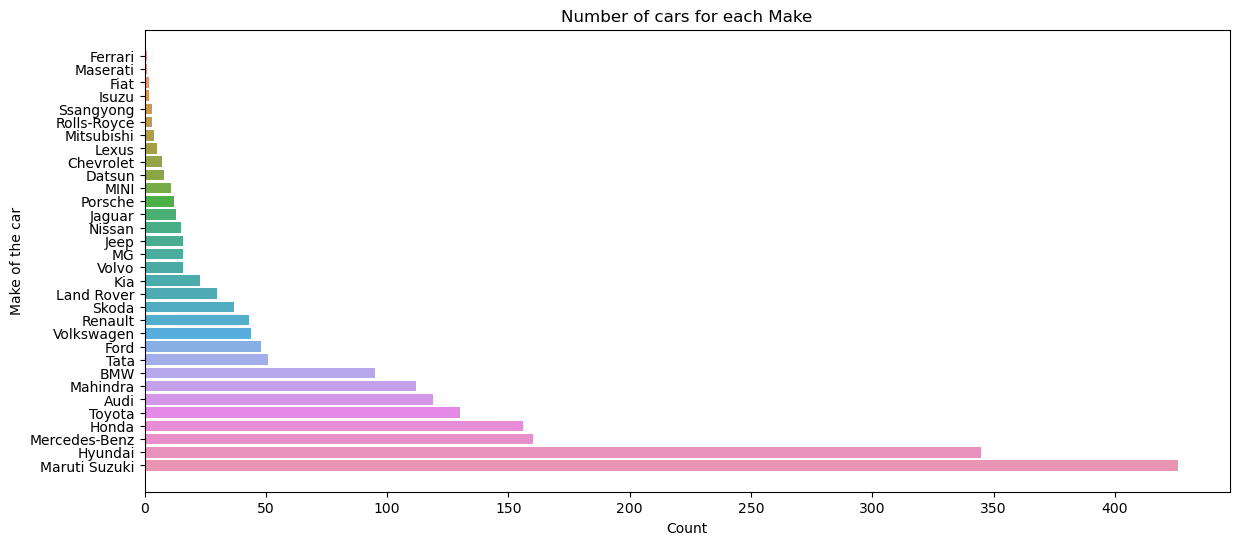

In [1616]:
#Frequency of cars with respect to the Make
plt.figure(figsize=(14,6))
sorted_df = df['Make'].value_counts().sort_values(ascending=True)
sns.countplot(y="Make", data=df, orient='h', order=sorted_df.index)
plt.title('Number of cars for each Make')
plt.xlabel('Count')
plt.ylabel('Make of the car')
plt.plot()

We can observe that a large number of Maruti Suzki anad Hyundai cars are being sold on the car dekho.  
<br>High end cars like Ferrari, Fiat, Rolls-Royce have very low frequency.

[]

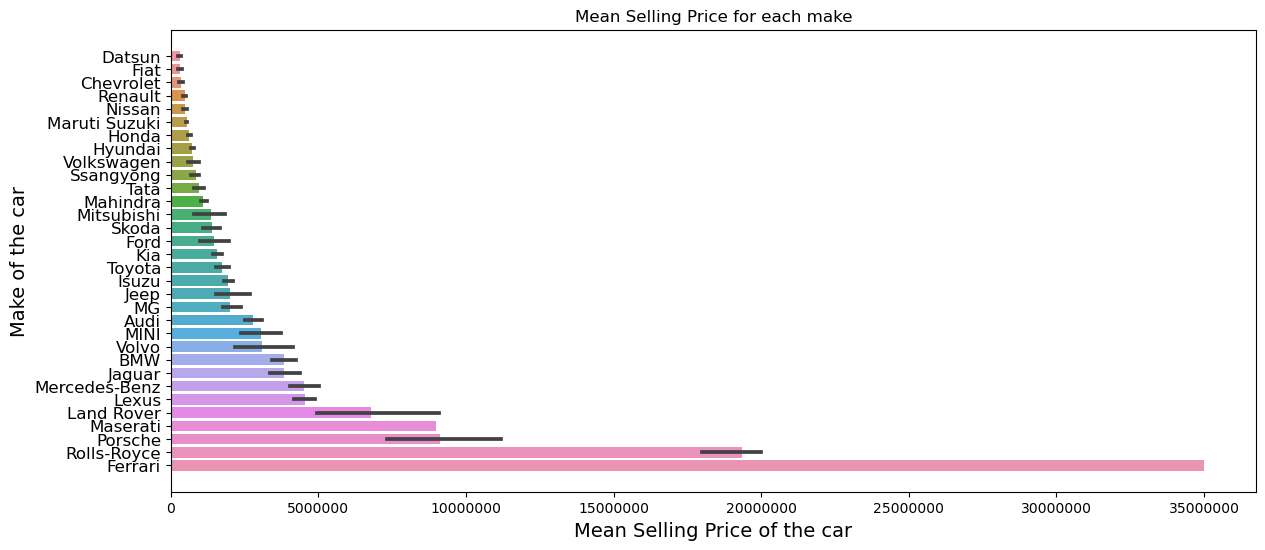

In [1617]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x=df["Price"], y=df.Make, order=df.groupby("Make")["Price"].mean().sort_values(ascending=True).index)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
ax.yaxis.set_tick_params(labelsize=12)
ax.set_xlabel("Price", fontsize=14)
ax.set_ylabel("Make", fontsize=14)
plt.title('Mean Selling Price for each make')
plt.xlabel('Mean Selling Price of the car')
plt.ylabel('Make of the car')
plt.plot()

Though the number of high end cars is less, but the average selling prices of these car makes are very high compared to rest of the makes.

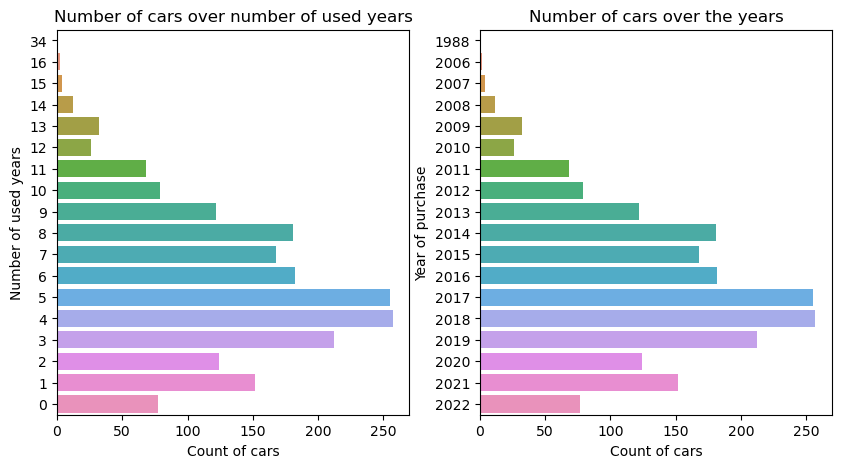

In [1618]:
fig,ax = plt.subplots(1,2, figsize=(10, 5))
sns.countplot(y="Used Year", data=df,  order=np.sort(df["Used Year"].unique())[::-1], orient='h', ax=ax[0])
ax[0].set_title('Number of cars over number of used years')
ax[0].set_xlabel('Count of cars')
ax[0].set_ylabel('Number of used years')

sns.countplot(y="Year", data=df, orient='h', ax=ax[1])
ax[1].set_title('Number of cars over the years')
ax[1].set_xlabel('Count of cars')
ax[1].set_ylabel('Year of purchase')
plt.show()

There is just one car from 1988 i.e. its age is 34 years old.
<br>Most of the cars are from 2017-2018 years i.e. 5-6 years old.
<br>More than half of the cars available to sell are less than a decade years old.

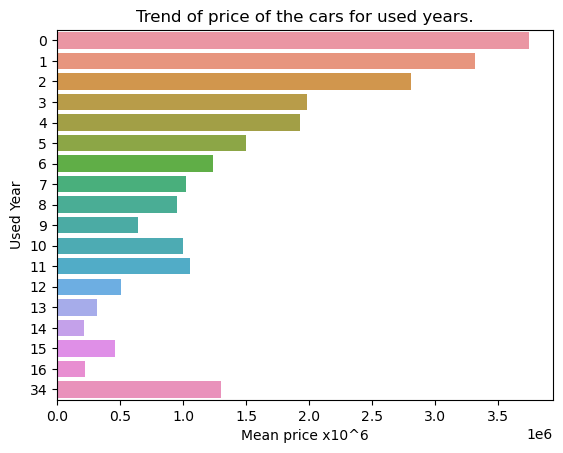

In [1619]:
df_temp = df['Price'].groupby(df['Used Year']).mean()
df_temp = df_temp.reset_index()
df_temp.columns = ['Used Year', 'Mean']
sns.barplot(y=df_temp['Used Year'], x=df_temp['Mean'], orient='h')
plt.title("Trend of price of the cars for used years.")
plt.xlabel("Mean price x10^6")
plt.show()

Cars which are used for less number of years are expensive as compared to the cars which are older. However, the one of the car which is 34 years old is does not show a decreasing trend. May be the car is vintage and rare model hence the cost is high.

Text(0.5, 1.0, 'Selling price trends over km driven')

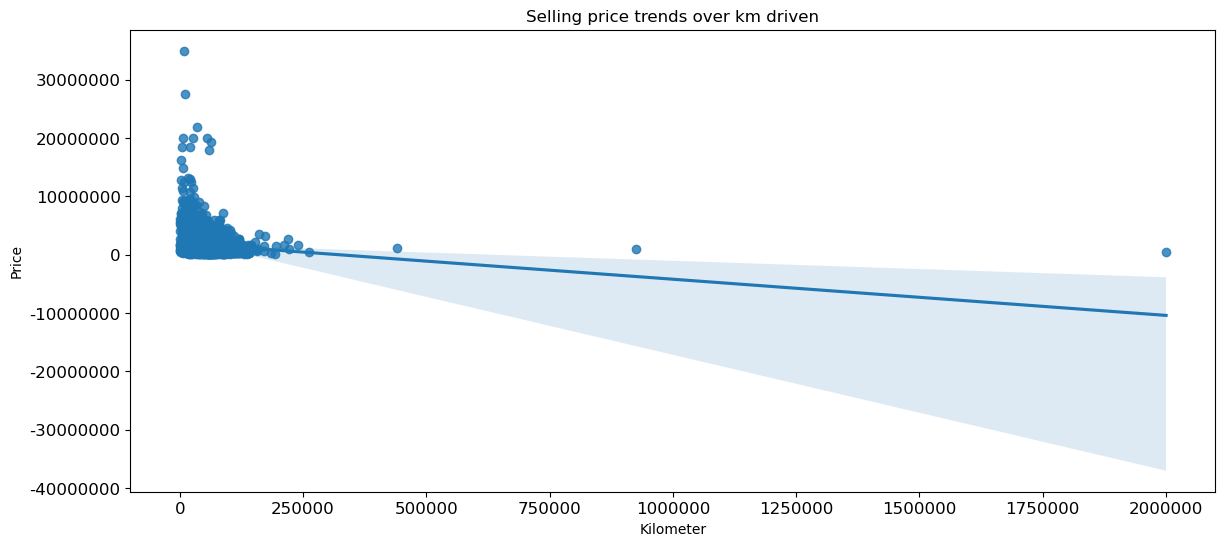

In [1620]:
plt.figure(figsize=(14,6))
ax=sns.regplot(x=df['Kilometer'], y=df['Price'])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
ax.xaxis.set_tick_params(labelsize=12)
ax.set_title("Selling price trends over km driven")

Most of the car are driven under 250K kms with few outlieres greater than that.
<br> Let's zoom over the the majority of the data to understand the trends.

Text(0.5, 1.0, 'Selling price trends over km driven (less than 250K km)')

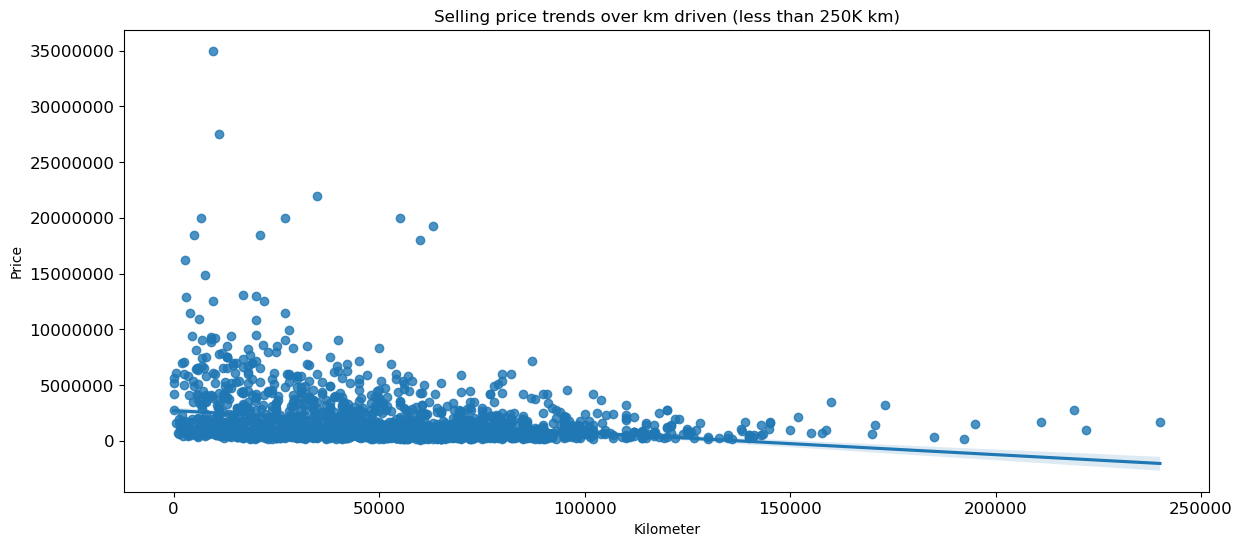

In [1621]:
df_temp = df[df['Kilometer'] < 250000]
plt.figure(figsize=(14,6))
ax=sns.regplot(x=df_temp['Kilometer'], y=df_temp['Price'])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
ax.xaxis.set_tick_params(labelsize=12)
ax.set_title("Selling price trends over km driven (less than 250K km)")

We can see that as the kms increases, the selling price of the car decreases.

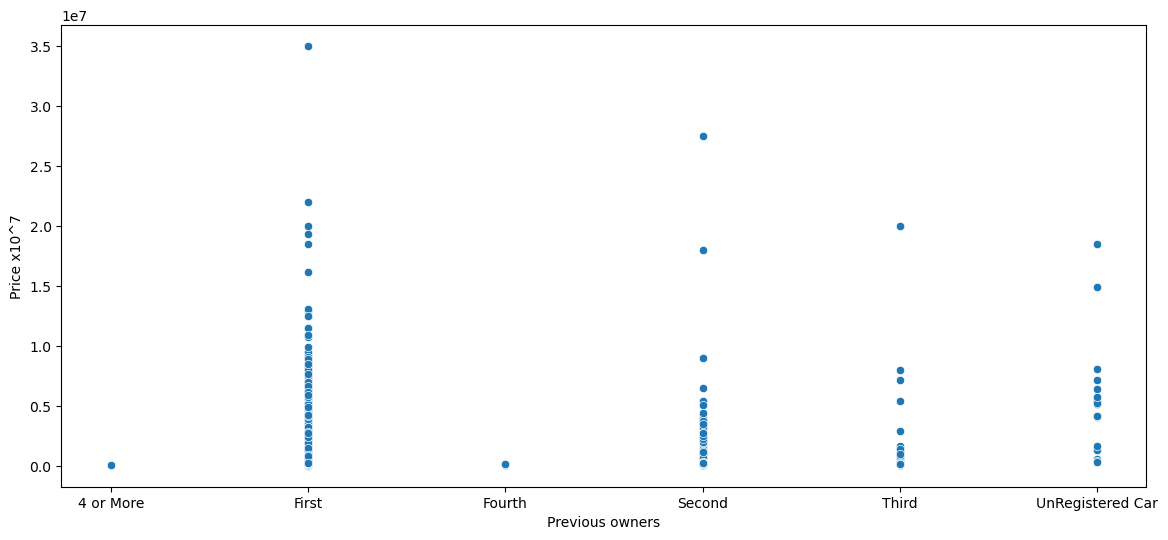

In [1622]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=df.Owner, y=df['Price'])
plt.xlabel("Previous owners")
plt.ylabel("Price x10^7")
plt.show()

The selling price of the first owner cars is generally high and shows a downward trend with second, third, fourth and 4+ owners. Unregistered cars have price in between third and fourth owners.

Text(0.5, 1.0, 'Selling Price trends over engine capacity')

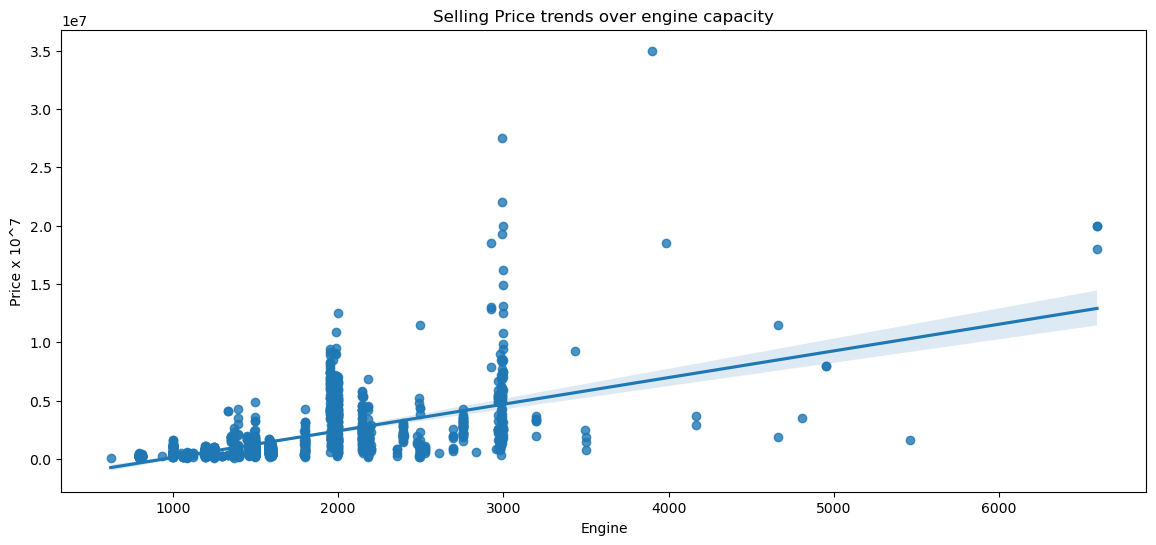

In [1623]:
plt.figure(figsize=(14,6))
sns.regplot(x=df.Engine, y=df['Price'])
plt.ylabel("Price x 10^7")
plt.title("Selling Price trends over engine capacity")

Greater the capacity of the engine, higher is the selling price of the car.

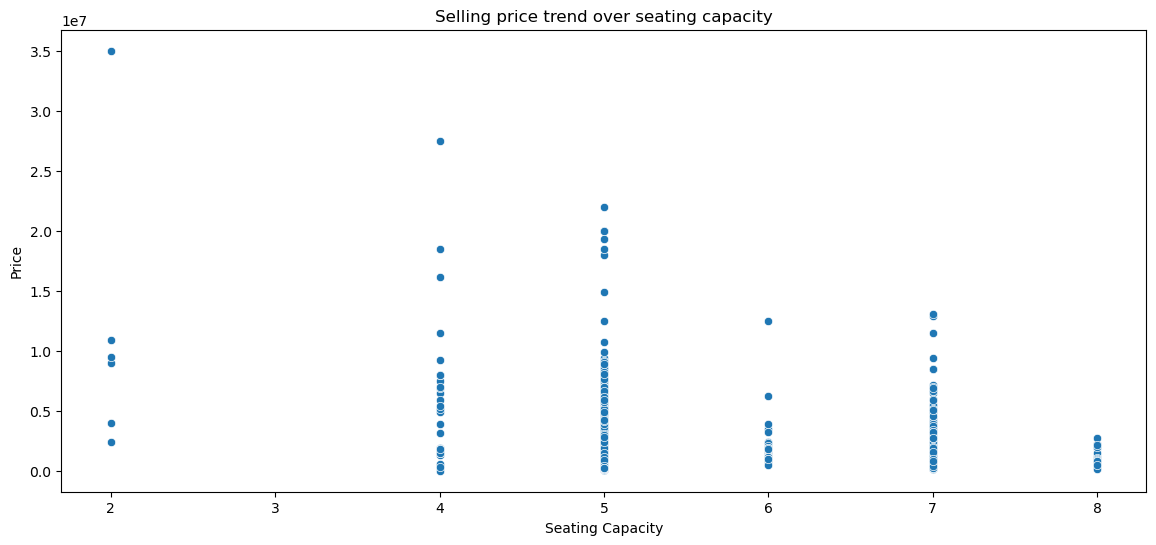

In [1624]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=df['Seating Capacity'], y=df.Price)
plt.title("Selling price trend over seating capacity")
plt.show()

Selling Price of 4-5 seater cars is relatively higher than other options. 
<br>For capacity 8 we have a lowest selling price trend.
<br>There is one outlier for two seating capacity which has highest price. Otherwise the price of two seaters is less than that of four seaters.

Text(0.5, 1.0, 'Selling price trend over Fuel Type')

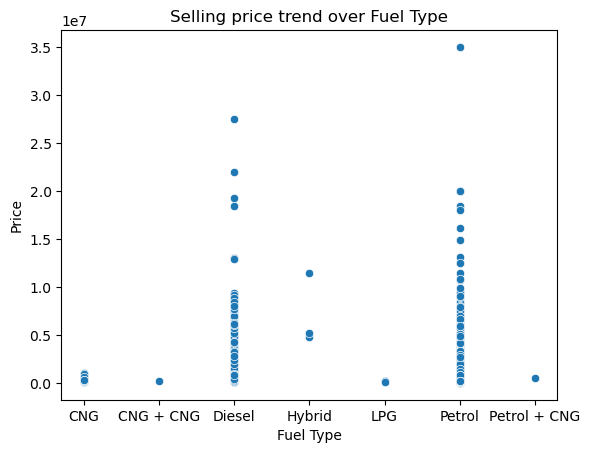

In [1625]:
sns.scatterplot(x=df['Fuel Type'], y=df.Price)
plt.title("Selling price trend over Fuel Type")

Petrol and Diesel cars have higher prices compared to others fuel categories.

Text(0.5, 1.0, 'Price vs Transmission without outliers')

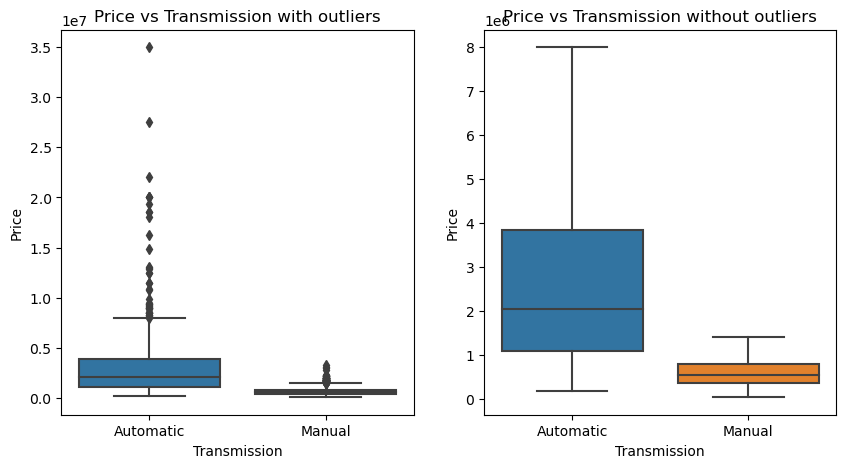

In [1626]:
fig,ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(x="Transmission", y="Price", data=df, showfliers=True,ax=ax[0])
ax[0].set_title("Price vs Transmission with outliers")
sns.boxplot(x="Transmission", y="Price", data=df, showfliers=False,ax=ax[1])
ax[1].set_title("Price vs Transmission without outliers")

Selling Price of Automatic Transmission is higher as compared to Manual Transmission.

There are 1563 samples for training the model and 391 samples for testing the model.

**Drop unnecessary features**<br>
Features - Year, Max Power and Max Torque have been extracted and converted into relevant features. So we can drop these. 

In [1628]:
df.drop(columns=['Year','Max Power','Max Torque'], inplace=True)
df.shape

(1954, 22)

In [ ]:
fgdhdhfhfg

### Correlation between the data features

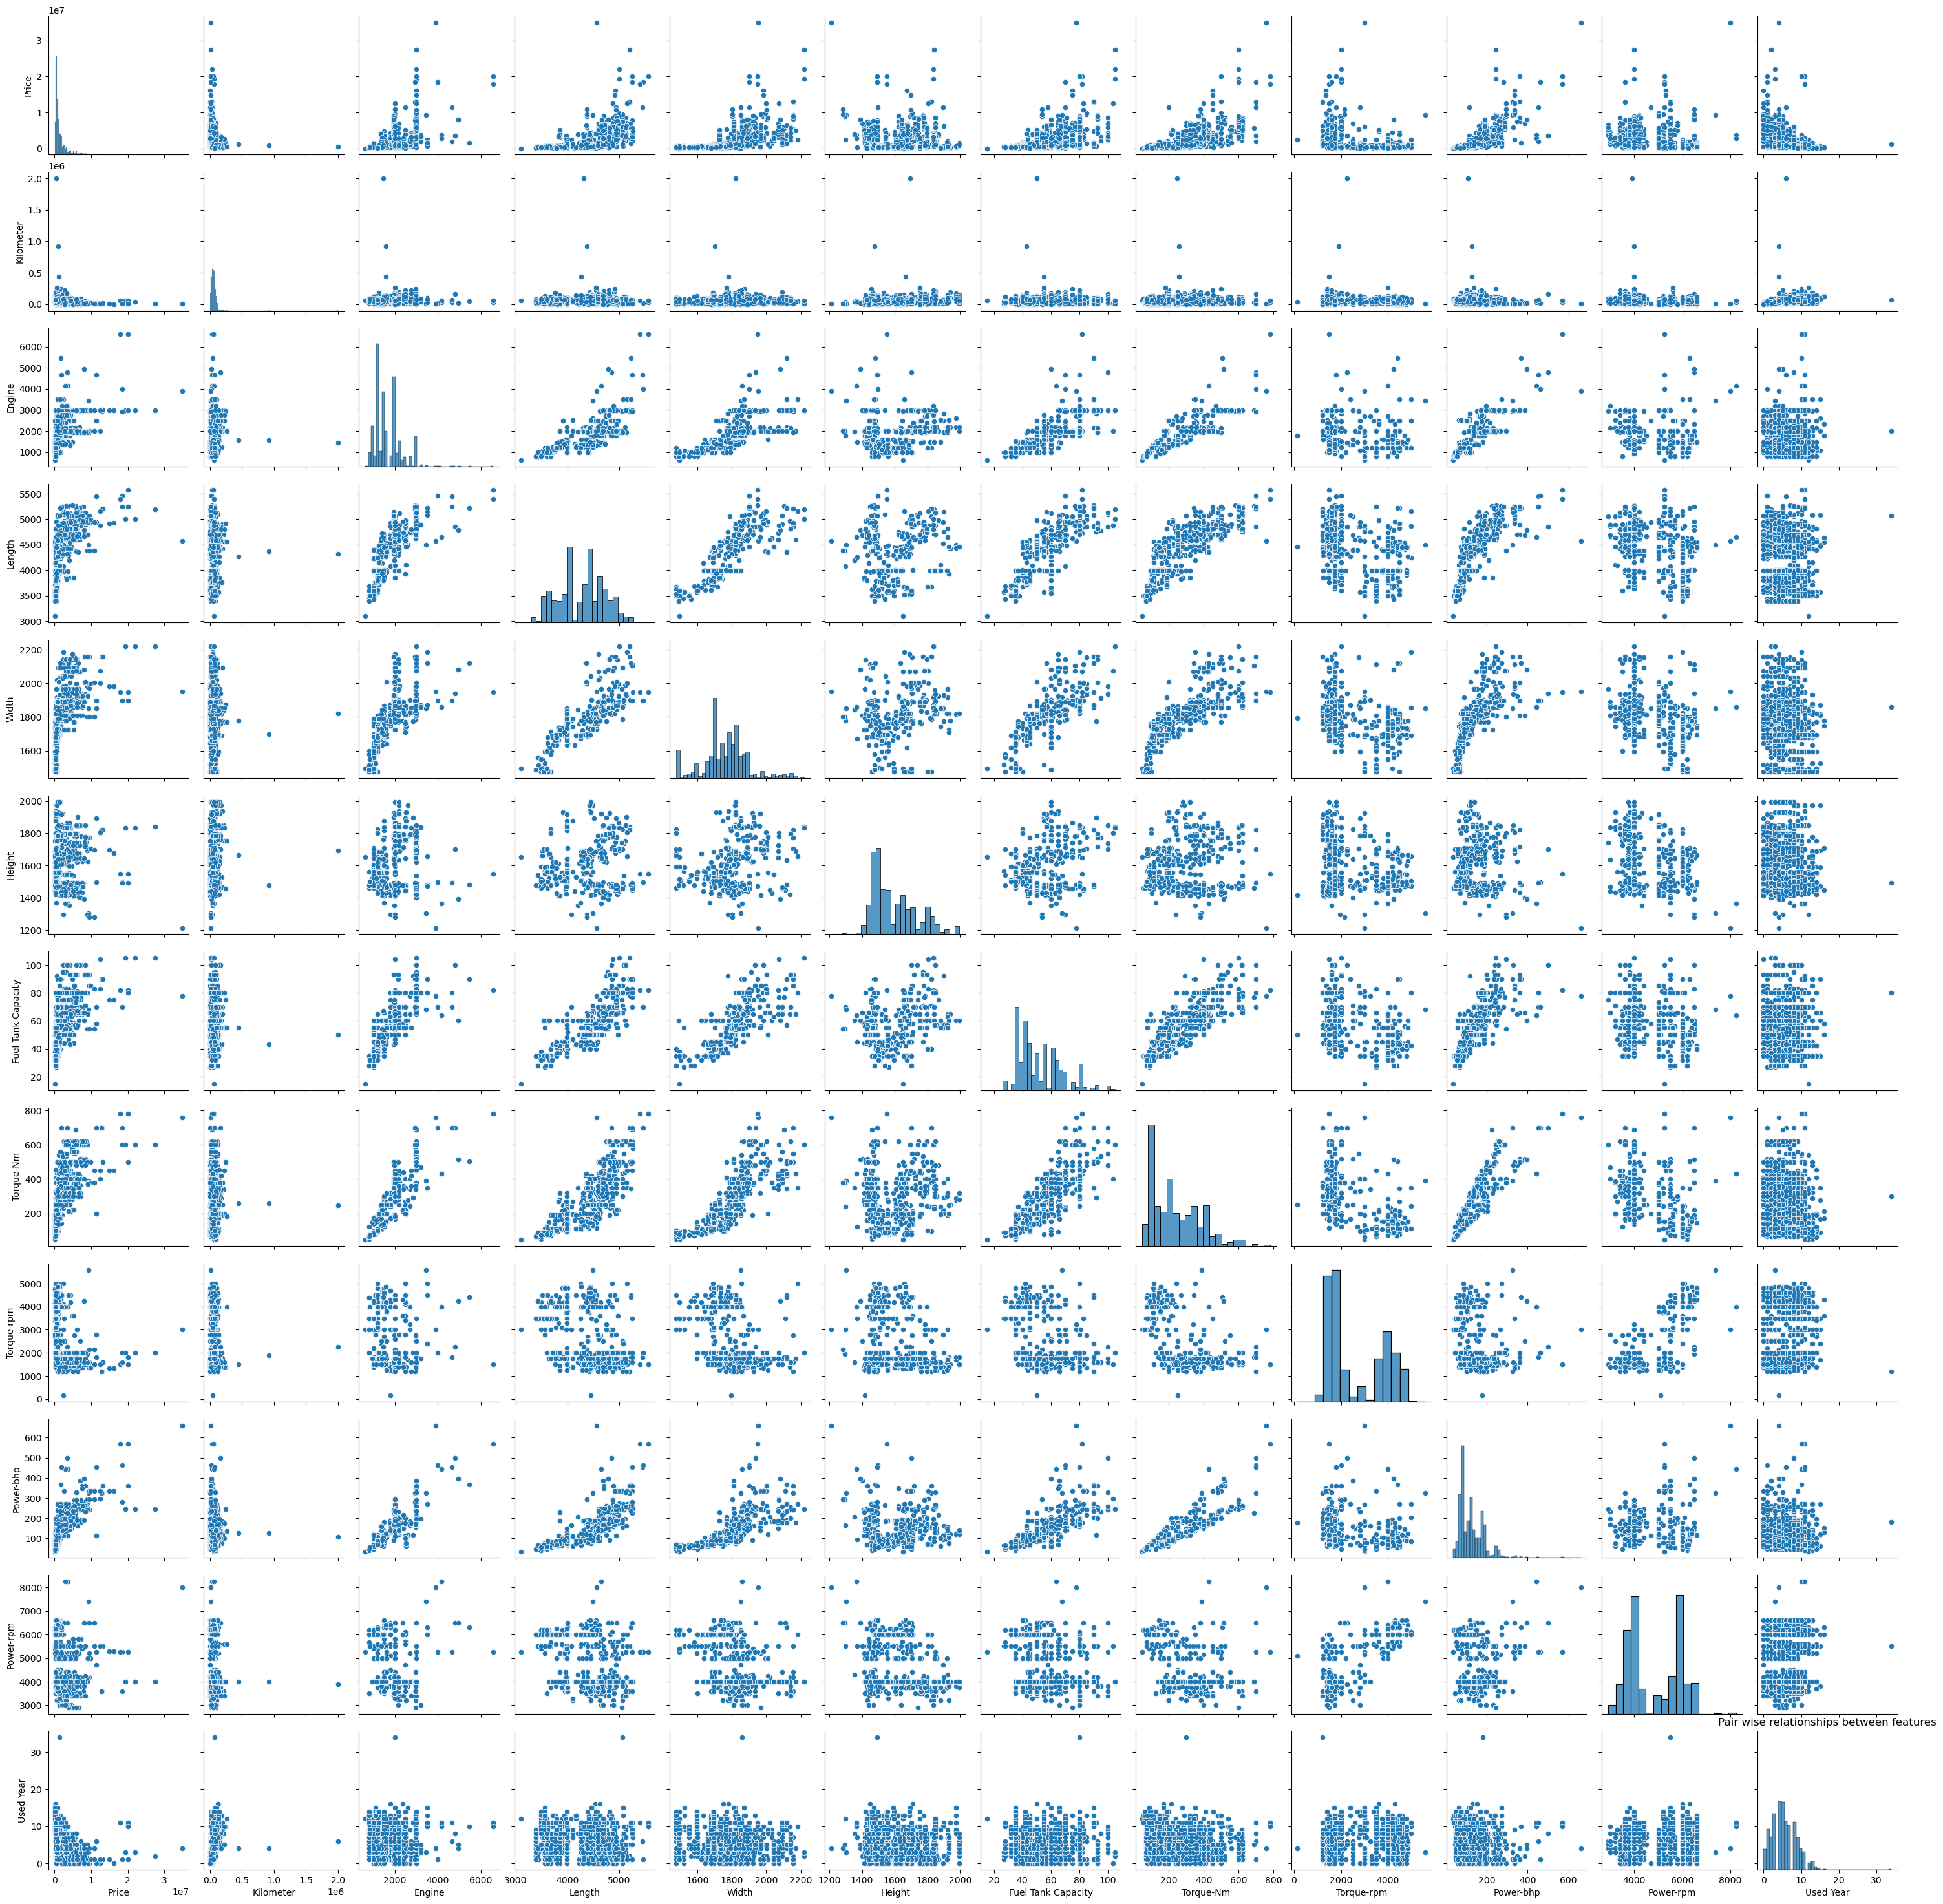

In [1629]:
#pairplot
sns.pairplot(df) #diag_kind="hist"
plt.title("Pair wise relationships between features")
plt.show()

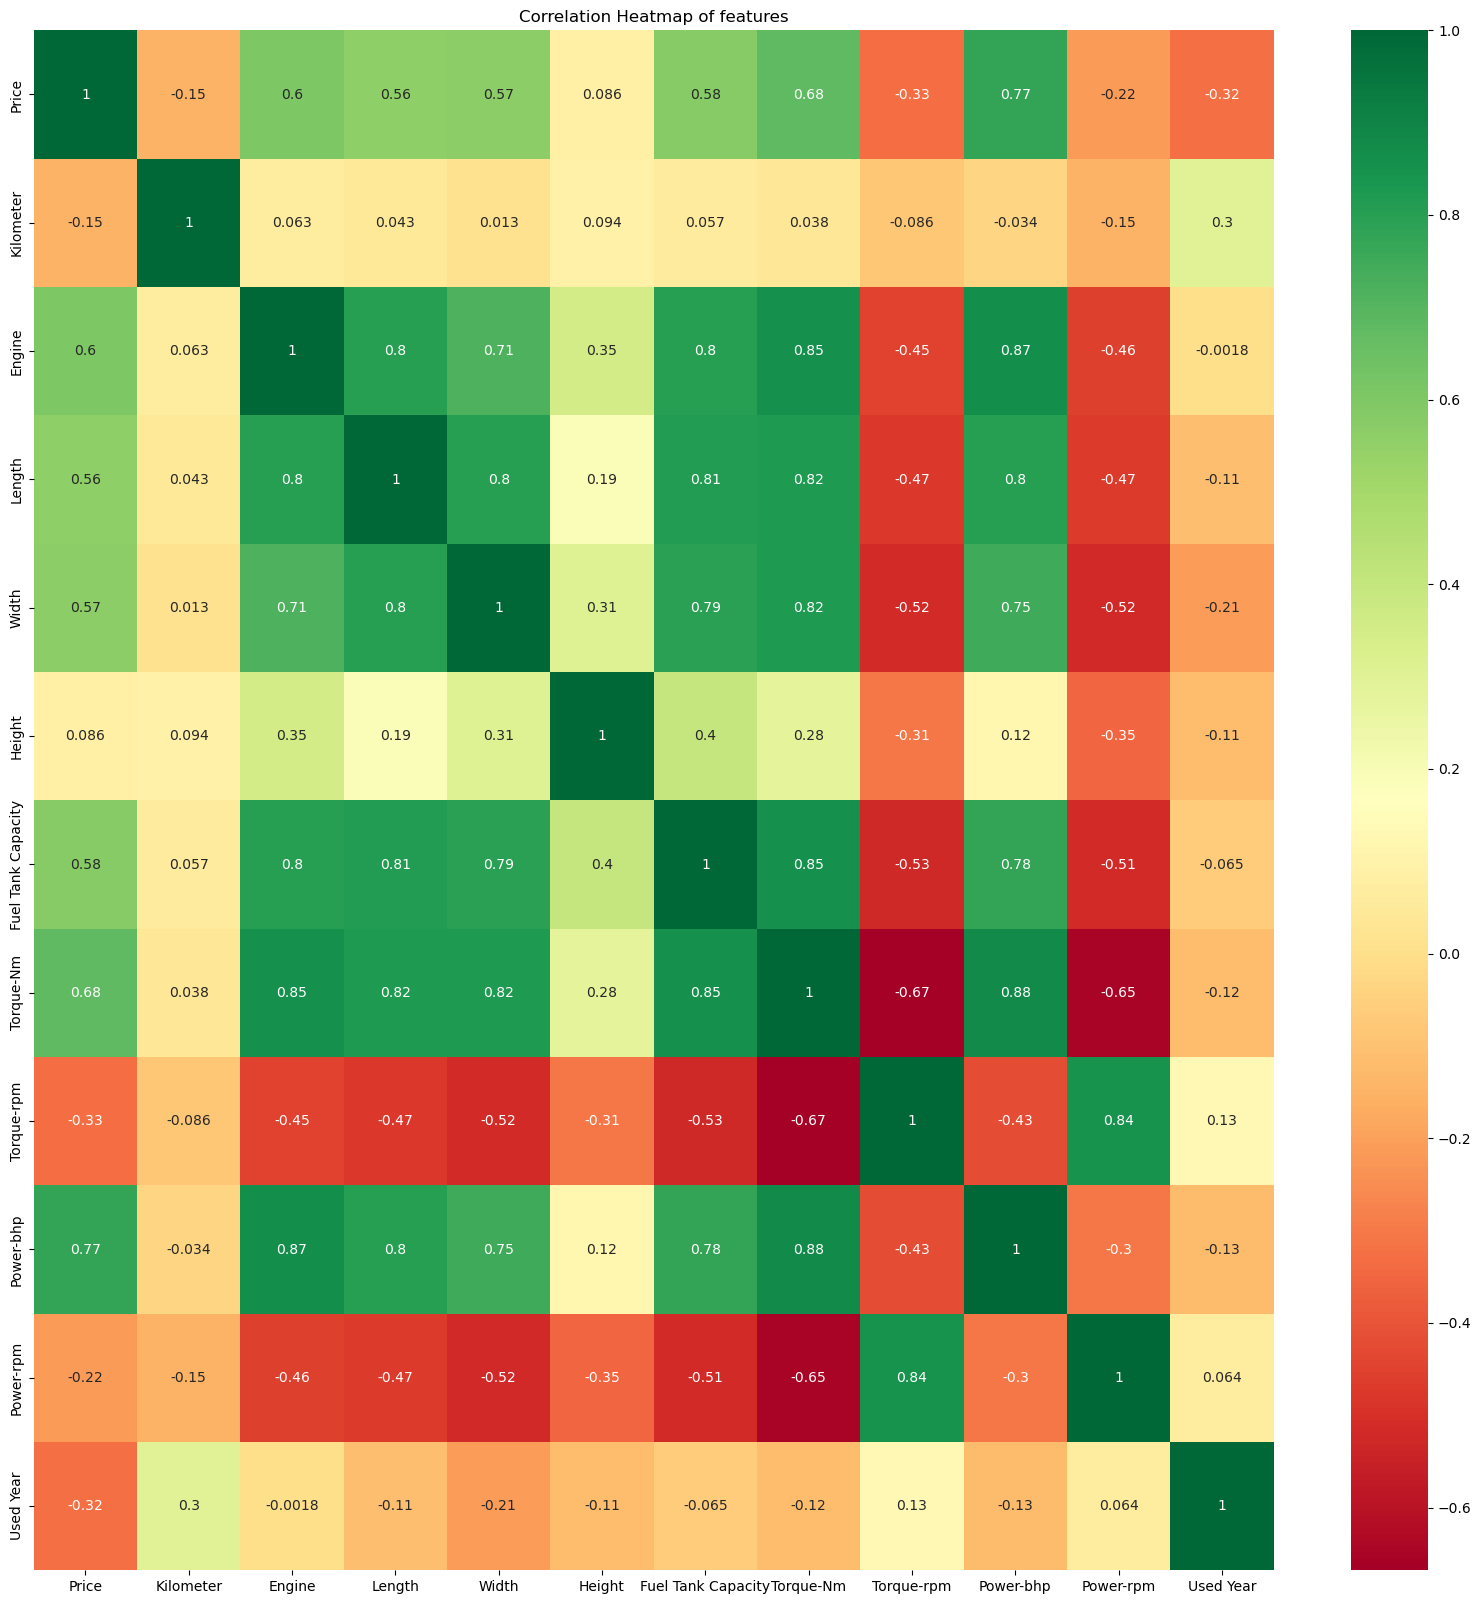

In [1630]:
#find correlation
corr = df.corr() 
top_corr_features = corr.index 
plt.figure(figsize=(20,20)) 
#plot the heat map 
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.title("Correlation Heatmap of features")
plt.show()

- We can observe some strong correlation between following variables 
    - Torque (nm) and Power (bhp) : 0.88
    - engine and Power (bhp) : 0.87
    - engine and Torque(nm) : 0.86 
    - fuel tank capacity and  Torque (nm) : 0.85

### Partitioning

In [1633]:
#year and model are not necessary feature so we drop them
X = df.drop(columns=['Price', 'Model'])
#price is target
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1563, 20), (391, 20))

### Encoding and Normalization

Encoding and Normalization are two important preprocessing steps in machine learning.
- Encoding is the process of converting categorical data into numerical values that can be used by machine learning algorithms.
- Normalization is the process of scaling numerical data so that all the features are on the same scale. This is important because some machine learning algorithms are sensitive to the scale of the features.

**Encoding categorical features**

In [1634]:
categories = X_train.select_dtypes(include=['object', 'category']).columns
categories.tolist()

['Make',
 'Fuel Type',
 'Transmission',
 'Location',
 'Color',
 'Owner',
 'Seller Type',
 'Drivetrain',
 'Seating Capacity']

We have 9 categorical features in our dataset. 
Let's identify the nature of the category to perfom appropriate encoding.

In [1635]:
for col in categories.tolist() : 
    print(col, "\n", df[col].cat.categories)
    #print( col, " : \n",X_train[col].unique())
    print()

Make 
 Index(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Ferrari', 'Fiat', 'Ford',
       'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'MG', 'MINI', 'Mahindra', 'Maruti Suzuki', 'Maserati',
       'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Porsche', 'Renault',
       'Rolls-Royce', 'Skoda', 'Ssangyong', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'],
      dtype='object')

Fuel Type 
 Index(['CNG', 'CNG + CNG', 'Diesel', 'Hybrid', 'LPG', 'Petrol',
       'Petrol + CNG'],
      dtype='object')

Transmission 
 Index(['Automatic', 'Manual'], dtype='object')

Location 
 Index(['Agra', 'Ahmedabad', 'Allahabad', 'Ambala Cantt', 'Amritsar',
       'Aurangabad', 'Bangalore', 'Bhopal', 'Bhubaneswar', 'Bulandshahar',
       'Chandigarh', 'Chennai', 'Coimbatore', 'Dak. Kannada', 'Dehradun',
       'Delhi', 'Deoghar', 'Dharwad', 'Ernakulam', 'Faizabad', 'Faridabad',
       'Ghaziabad', 'Goa', 'Gorakhpur', 'Gurgaon', 'Guwahati', 'Haldwani',
       'Hyderabad', 'In

Nominal Categories : since there is no inherent ordering in them : 
- Make
- Fuel Type
- Transmission
- Location
- Color
- Seller Type
- Drivetrain

Ordinal Categories : 
- Seating Capacity
- Owner
The "Owner" variable can be considered ordinal as it has a specific order of values:<br>
UnRegistered Car (new car), First, Second, Third, Fourth, 4 or More

**Ordinal Encoding**

In [1636]:
# create an instance of OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['UnRegistered Car', 'First', 'Second', 'Third', 'Fourth', '4 or More']])

# encode the 'Owner' column
X_train['Owner'] = ordinal_encoder.fit_transform(X_train[['Owner']])
X_test['Owner'] = ordinal_encoder.transform(X_test[['Owner']])

Seating Capacity has labels corresponding to numeric ordering so we do not need to encode them separately.

**Nominal Encoding**

In [1637]:
X_train.shape

(1563, 20)

In [1638]:
#nominal categories to encode
one_cat = ['Make','Fuel Type','Transmission','Location','Color','Seller Type','Drivetrain']

# Fit and transform the categorical feature(s)
X_train = pd.get_dummies(X_train, columns=one_cat, drop_first=True)
X_test = pd.get_dummies(X_test, columns=one_cat, drop_first=True)
X_train.shape

(1563, 146)

Before encoding we had 20 variables, but since some categories have large number of values we have large number of features after encoding.

**Normalization**

In [1640]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)